#**Surrogate Models**
This code trains a Gradient Boosting Machine on the breast cancer data set, then creates a decision tree surrogate model of the GBM.

Surrogate Model (for GBM) Accuracy: 0.9474


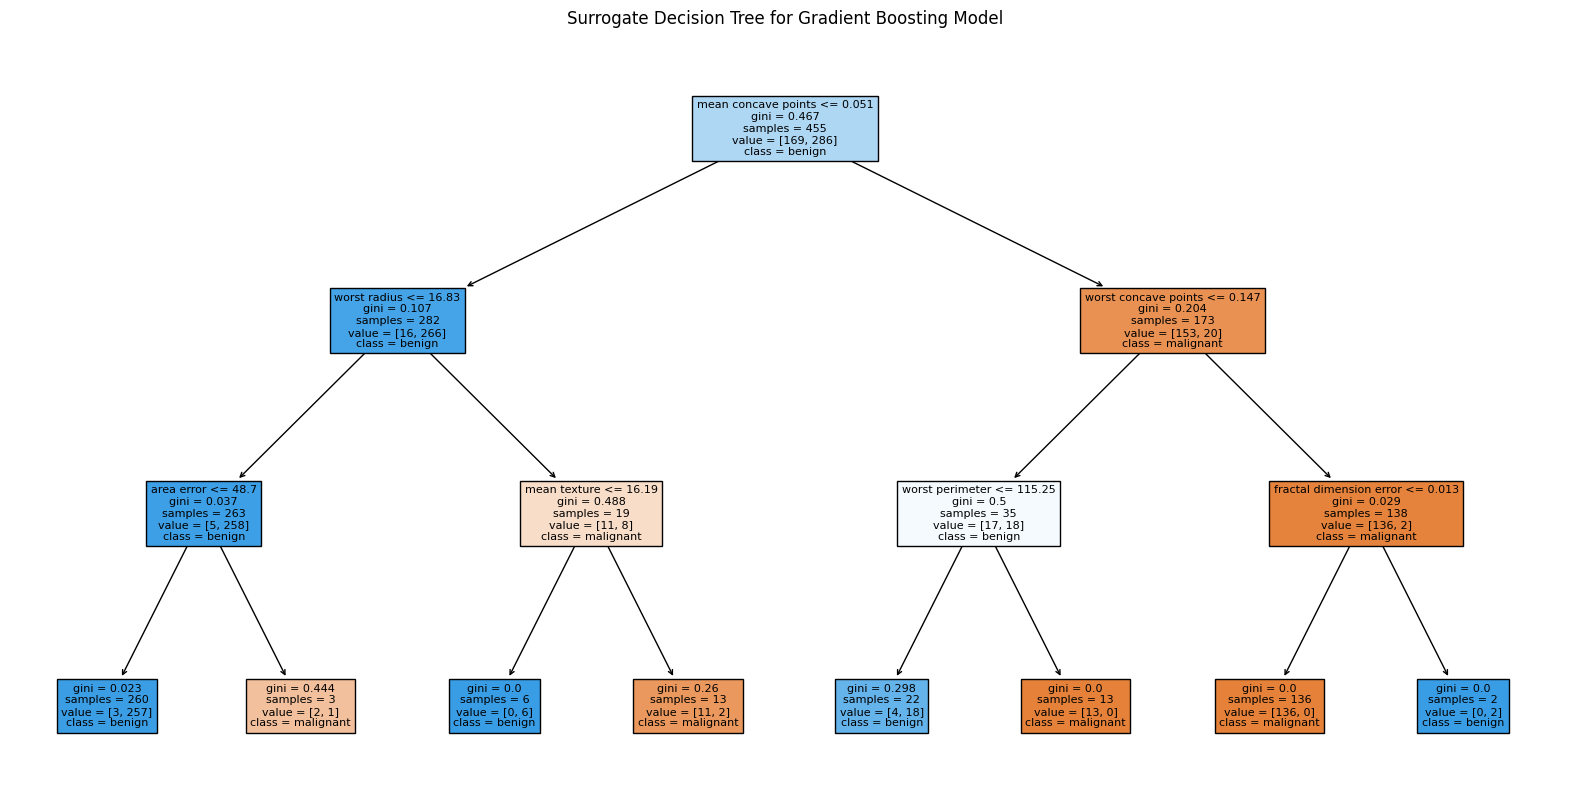

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Model (GBM)
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

# Predictions from the GBM model
gbm_predictions = gbm_model.predict(X_train)

# Train a Decision Tree as a surrogate model to approximate the GBM model
surrogate_gbm_model = DecisionTreeClassifier(max_depth=3, random_state=42)
surrogate_gbm_model.fit(X_train, gbm_predictions)  # Use GBM's predictions as targets

# Evaluate the surrogate model on the test data
surrogate_gbm_predictions = surrogate_gbm_model.predict(X_test)
accuracy_gbm = accuracy_score(y_test, surrogate_gbm_predictions)
print(f"Surrogate Model (for GBM) Accuracy: {accuracy_gbm:.4f}")

# Plot the surrogate Decision Tree for GBM
plt.figure(figsize=(20, 10))
plot_tree(surrogate_gbm_model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Surrogate Decision Tree for Gradient Boosting Model")
plt.show()
